In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime

# 一、时间戳 Timestamp 对象


# 生成***时刻***有如下两种方法
- pd.Timestamp()   直接生成时间戳
- pd.to_datetime()   将其转变成时间形式

## 1. pd.Timestamp
- 1.1 传入一个字符串
- 1.2 传入一个数值
- 1.3 传入多个日期元素
- 1.4 传入一个datetime实例

- 类型 描述
- %Y 四位的年份
- %y 两位的年份
- %m 两位的月份
- %d 两位的日期号
- %H 小时，24小时制00-23
- %I 小时，12小时制01-12
- %M 两位的分钟00-59
- %S 秒00-61，其中60,61是闰秒
- %w 星期日期0-6，其中0表示星期日
- %U 一年中的星期数00-53。以星期天为每周第一天，一年中第一个星期天前的日期作为第“0”周
- %W 一年中的星期数00-53。以星期一为每周第一天，一年中第一个星期一前的日期作为第“0”周
- %z 格式为+HHMM或者-HHMM的UTC时区偏移；如果没有时区则为空。
- %F %Y-%m-%d的简写
- %D %m/%d/%y的简写

In [2]:
# 对象为字符串
pd.Timestamp('2019-10-30')
# 字符串要求必须有一定的规律

Timestamp('2019-10-30 00:00:00')

In [3]:
# T 表示是时间
pd.Timestamp('2019/10/30T12')

Timestamp('2019-10-30 12:00:00')

In [4]:
pd.Timestamp('2019/10/30T123030')

Timestamp('2019-10-30 12:30:30')

In [5]:
pd.Timestamp(0)
# python的初始时间

Timestamp('1970-01-01 00:00:00')

In [6]:
# 对象为数值  在python初始的默认时间上加该数值得到一个时间
pd.Timestamp(2019)

Timestamp('1970-01-01 00:00:00.000002019')

In [7]:
pd.Timestamp(2019,unit='s')
# 表示在初始的时间上加2019秒 转化成33分39秒

Timestamp('1970-01-01 00:33:39')

In [8]:
pd.Timestamp(2019,unit='m')

Timestamp('1970-01-02 09:39:00')

In [9]:
pd.Timestamp(2019,unit='h')

Timestamp('1970-03-26 03:00:00')

In [10]:
# 可设定时区，默认的时区为0时区
pd.Timestamp(2019,tz='Asia/Shanghai')
# 亚洲或上海的时区

Timestamp('1970-01-01 08:00:00.000002019+0800', tz='Asia/Shanghai')

In [11]:
# # 查看所有的时区
# import pytz
# pytz.common_timezones

In [12]:
#传入多个日期元素
pd.Timestamp(2019,10,30,12,30,45)

Timestamp('2019-10-30 12:30:45')

In [13]:
ye=pd.Timestamp(year=2019,month=10,day=30,hour=16,minute=59,second=30)

In [14]:
type(ye)
# 类型时间戳

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
# 传入datetime
pd.Timestamp(pd.datetime(2019,10,30))

Timestamp('2019-10-30 00:00:00')

## 2. pd.to_datetime
- 1.1 传入一个字符串
- 1.2 传入一个数值
- 1.3 传入一个datetime实例

In [16]:
# 传入字符串
pd.to_datetime('2019/10/30',format='%Y/%m%d',errors='ignore')
# coerce 强迫

'2019/10/30'

In [17]:
# 传入数值
pd.to_datetime(1,unit='s')

Timestamp('1970-01-01 00:00:01')

In [18]:
# 传入datetime实例
y2=pd.to_datetime(pd.datetime(2019,10,30))
y2

Timestamp('2019-10-30 00:00:00')

In [19]:
type(y2)

pandas._libs.tslibs.timestamps.Timestamp

## 获取当前时间

In [20]:
print(dir(pd.datetime))

['__add__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', 'astimezone', 'combine', 'ctime', 'date', 'day', 'dst', 'fold', 'fromisoformat', 'fromordinal', 'fromtimestamp', 'hour', 'isocalendar', 'isoformat', 'isoweekday', 'max', 'microsecond', 'min', 'minute', 'month', 'now', 'replace', 'resolution', 'second', 'strftime', 'strptime', 'time', 'timestamp', 'timetuple', 'timetz', 'today', 'toordinal', 'tzinfo', 'tzname', 'utcfromtimestamp', 'utcnow', 'utcoffset', 'utctimetuple', 'weekday', 'year']


In [21]:
# 当前的时间
pd.datetime.now()

datetime.datetime(2019, 11, 16, 22, 9, 15, 717209)

In [22]:
pd.datetime.date(pd.datetime.now())
# 需要日期的参数

datetime.date(2019, 11, 16)

In [23]:
# datetime的获取当前时间的方式
# 当前时间
datetime.datetime.now()

datetime.datetime(2019, 11, 16, 22, 9, 16, 50228)

In [24]:
datetime.datetime.now().timetuple()
# time.struct_time类型

time.struct_time(tm_year=2019, tm_mon=11, tm_mday=16, tm_hour=22, tm_min=9, tm_sec=16, tm_wday=5, tm_yday=320, tm_isdst=-1)

In [25]:
# time获取当前的时间的方式
# 当前时间
time.localtime()
# time.struct_time类型

time.struct_time(tm_year=2019, tm_mon=11, tm_mday=16, tm_hour=22, tm_min=9, tm_sec=16, tm_wday=5, tm_yday=320, tm_isdst=0)

## 时间戳的属性和一些应用的方法
- 函数  需要加括号
- 属性  不需要加括号

In [26]:
a=pd.Timestamp('2019-10-30T172830')
a

Timestamp('2019-10-30 17:28:30')

In [27]:
print(dir(a))

['__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pyx_vtable__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_date_attributes', '_date_repr', '_get_date_name_field', '_get_start_end_field', '_has_time_component', '_repr_base', '_round', '_short_repr', '_time_repr', 'asm8', 'astimezone', 'ceil', 'combine', 'ctime', 'date', 'day', 'day_name', 'dayofweek', 'dayofyear', 'days_in_month', 'daysinmonth', 'dst', 'floor', 'fold', 'freq', 'freqstr', 'fromisoformat', 'fromordinal', 'fromtimestamp', 'hour', 'is_leap_year', 'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end', 'is_year_start', 'isocalendar', 'isoformat', 'isoweekday', 'max', 'microsecond'

In [28]:
# date是函数 需要带扩号才能输出值
# 日期
a.date()

datetime.date(2019, 10, 30)

In [29]:
# 年
a.year

2019

In [30]:
# 月
a.month

10

In [31]:
# 日
a.day

30

In [32]:
# 时间
a.time()

datetime.time(17, 28, 30)

In [33]:
print('hour:',a.hour)
print('minute:',a.minute)
print('second:',a.second)

hour: 17
minute: 28
second: 30


In [34]:
# 调取星期
a.day_name()

'Wednesday'

- ### ***dayofweek 默认的星期一为0***

In [35]:
 #调取星期几
a.dayofweek
# 星期一为0

2

In [36]:
a.value
# a的数值，划分成秒

1572456510000000000

In [37]:
# 返回距离的秒数
a.timestamp()

1572456510.0

- **将Timestamp变成指定格式的字符串。**

In [38]:
a.strftime("%m/%d/%Y") 

'10/30/2019'

In [39]:
a.strftime('%A')
# 返回的星期几

'Wednesday'

# 二、时差Timedelta

- 两个Timestamp时间相减
- 直接生成 运用 Timedelta

In [40]:
b=pd.Timestamp('2019/10/30T184845')
c=pd.Timestamp('2019/10/31T123034')

In [41]:
b

Timestamp('2019-10-30 18:48:45')

In [42]:
c

Timestamp('2019-10-31 12:30:34')

In [43]:
# 时间差
c-b

Timedelta('0 days 17:41:49')

In [44]:
# 直接生成时间差
d=pd.Timedelta(days=30,hours=10,minutes=30,seconds=29)

# allowed keywords are [weeks, days, hours, minutes, 
#                       seconds, milliseconds, microseconds, 
#                       nanoseconds]
d

Timedelta('30 days 10:30:29')

In [45]:
d.total_seconds()
# 总秒数

2629829.0

In [46]:
d.delta
# 总纳秒数

2629829000000000

In [47]:
# 时间差的组成
#属性
d.components

Components(days=30, hours=10, minutes=30, seconds=29, milliseconds=0, microseconds=0, nanoseconds=0)

In [48]:
# 索取时间差组成的个内容
d.components.days

30

In [49]:
d.components.minutes

30

In [50]:
# 毫秒
d.components.milliseconds

0

In [51]:
# 微秒
d.components.microseconds

0

In [52]:
# 纳秒
d.components.nanoseconds

0

#### **时间差的运算**

In [53]:
# + 加法运算
print('d:',d)
d+pd.Timedelta(days=10)

d: 30 days 10:30:29


Timedelta('40 days 10:30:29')

## 时间戳范围
- date_range

In [54]:
pd.date_range('2019/10/31',freq='D',periods=10)
# 按天计算的
#计算10个

DatetimeIndex(['2019-10-31', '2019-11-01', '2019-11-02', '2019-11-03',
               '2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07',
               '2019-11-08', '2019-11-09'],
              dtype='datetime64[ns]', freq='D')

In [55]:
pd.date_range('2019/10/31',freq='m',periods=10)
#间隔为月
# 计算10个

DatetimeIndex(['2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [56]:
pd.date_range('2019/10/31',freq='y',periods=5)

DatetimeIndex(['2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31',
               '2023-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [57]:
e=pd.date_range('2019/10/31',freq='Y',periods=5)
e

DatetimeIndex(['2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31',
               '2023-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [58]:
e[0]

Timestamp('2019-12-31 00:00:00', freq='A-DEC')

In [59]:
e[1]

Timestamp('2020-12-31 00:00:00', freq='A-DEC')

# 三、数据框里面对时间变量的操作
- 通过导入外部数据的方式获得日期时间变量

In [60]:
t=pd.read_excel('E:\python 资料\python 数据清洗（numpy、pandas、数据可视化）\pandas\上证指数日收盘价数据.xls')
t.head()

,index,date,p
0,上证指数,2003-01-06,1334.68
1,上证指数,2003-01-07,1332.06
2,上证指数,2003-01-08,1372.07
3,上证指数,2003-01-09,1397.38
4,上证指数,2003-01-10,1384.86


In [61]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 3 columns):
index    1569 non-null object
date     1569 non-null datetime64[ns]
p        1569 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 36.9+ KB


In [62]:
#将index删掉
t.drop(['index'],axis=1,inplace=True)

In [63]:
t.head()

,date,p
0,2003-01-06,1334.68
1,2003-01-07,1332.06
2,2003-01-08,1372.07
3,2003-01-09,1397.38
4,2003-01-10,1384.86


# 1.日期时间变量转变
- 距离纪元的总秒数
- 指定格式的字符串变量
    - 直接的方式 
        - t.date.dt.strtime()
    - map与lambda的搭配
        - t.date.map(lambda x:x.strftime()
        - t['date'].map(lambda x:x.strftime()

In [64]:
t['all seconds']=t['date'].map(lambda x:x.timestamp())
# 距离纪元的总秒数

In [65]:
t.head()

,date,p,all seconds
0,2003-01-06,1334.68,1.041811e+09
1,2003-01-07,1332.06,1.041898e+09
2,2003-01-08,1372.07,1.041984e+09
3,2003-01-09,1397.38,1.042070e+09
4,2003-01-10,1384.86,1.042157e+09


In [66]:
# 转化成指定的格式
t['//']=t.date.map(lambda x:x.strftime('%Y/%m/%d'))

In [67]:
t.head()

,date,p,all seconds,//
0,2003-01-06,1334.68,1.041811e+09,2003/01/06
1,2003-01-07,1332.06,1.041898e+09,2003/01/07
2,2003-01-08,1372.07,1.041984e+09,2003/01/08
3,2003-01-09,1397.38,1.042070e+09,2003/01/09
4,2003-01-10,1384.86,1.042157e+09,2003/01/10


In [68]:
# 直接转变
t['straight']=t.date.dt.strftime('%Y/%m/%d')
t.head()

,date,p,all seconds,//,straight
0,2003-01-06,1334.68,1.041811e+09,2003/01/06,2003/01/06
1,2003-01-07,1332.06,1.041898e+09,2003/01/07,2003/01/07
2,2003-01-08,1372.07,1.041984e+09,2003/01/08,2003/01/08
3,2003-01-09,1397.38,1.042070e+09,2003/01/09,2003/01/09
4,2003-01-10,1384.86,1.042157e+09,2003/01/10,2003/01/10


# 2.调用日期时间变量的各元素
- 方式一
    - t.date.dt.year
    - t.date.dt.month
    - t.date.dt.day
    - t.date.dt.dayofweek
- 方式二  map与lambda的搭配
     - t['date'].map(lambda x:x.date)
     - t['date'].map(lambda x:x.time)
     - t['date'].map(lambda x:x.year)
     - t['date'].map(lambda x:x.month)
     - t['date'].map(lambda x:x.day)     

In [69]:
#年
t['year']=t['date'].dt.year
# 月
t['month']=t['date'].dt.month
# 天
t['day']=t['date'].dt.day
# dayofweek 星期 默认星期一为0
t['dayofweek+1']=t['date'].dt.dayofweek+1

In [70]:
t.head()

,date,p,all seconds,//,straight,year,month,day,dayofweek+1
0,2003-01-06,1334.68,1.041811e+09,2003/01/06,2003/01/06,2003,1,6,1
1,2003-01-07,1332.06,1.041898e+09,2003/01/07,2003/01/07,2003,1,7,2
2,2003-01-08,1372.07,1.041984e+09,2003/01/08,2003/01/08,2003,1,8,3
3,2003-01-09,1397.38,1.042070e+09,2003/01/09,2003/01/09,2003,1,9,4
4,2003-01-10,1384.86,1.042157e+09,2003/01/10,2003/01/10,2003,1,10,5


In [71]:
# #方法2
# data1["year"]=data1["date"].map(lambda x:x.year) #把年调出来是一个int类型
# data1["month"]=data1["date"].map(lambda x:x.month) #把月调出来是一个int类型
# data1["day"]=data1["date"].map(lambda x:x.day) #把日调出来是一个int类型
# data1["date"].map(lambda x:x.date()) #把时间调出来,是一个object类型
# data1["date"].map(lambda x:x.time()) #把时间调出来,是一个object类型

# 3.年月日中取出年月
 - dt.to_period(freq='')

In [72]:
# help(t.date.dt.to_period)
# t.date.dt.to_period?
# np.info(t.date.dt.to_period)

In [73]:
# 取出年月
t['ym']=t.date.dt.to_period(freq='m')

In [74]:
t.head()

,date,p,all seconds,//,straight,year,month,day,dayofweek+1,ym
0,2003-01-06,1334.68,1.041811e+09,2003/01/06,2003/01/06,2003,1,6,1,2003-01
1,2003-01-07,1332.06,1.041898e+09,2003/01/07,2003/01/07,2003,1,7,2,2003-01
2,2003-01-08,1372.07,1.041984e+09,2003/01/08,2003/01/08,2003,1,8,3,2003-01
3,2003-01-09,1397.38,1.042070e+09,2003/01/09,2003/01/09,2003,1,9,4,2003-01
4,2003-01-10,1384.86,1.042157e+09,2003/01/10,2003/01/10,2003,1,10,5,2003-01


# 4.多个元素合成一个日期时间变量  apply与lambda的搭配
- apply(lambda  x:pd.Timestamp(x['year'],x['month'],x['day']),axis=1)

### **map搭配lambda与apply 搭配lambda的区别**

- map() 函数
    - 可以将一个函数映射到一个类型上面
    - 针对数据框的某一列
- apply()函数
    - pandas 库中的DataFrame数据框
    - 针对整个数据应用

In [75]:
t['date1']=t.apply(lambda x:pd.Timestamp(x['year'],x['month'],
                                         x['day']),axis=1)

In [76]:
t.head(3)

,date,p,all seconds,//,straight,year,month,day,dayofweek+1,ym,date1
0,2003-01-06,1334.68,1.041811e+09,2003/01/06,2003/01/06,2003,1,6,1,2003-01,2003-01-06
1,2003-01-07,1332.06,1.041898e+09,2003/01/07,2003/01/07,2003,1,7,2,2003-01,2003-01-07
2,2003-01-08,1372.07,1.041984e+09,2003/01/08,2003/01/08,2003,1,8,3,2003-01,2003-01-08


# 5.其他形式转化成日期 pd.to_datetime
- 字符串转变成日期   
- 数值转变成日期

In [77]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 11 columns):
date           1569 non-null datetime64[ns]
p              1569 non-null float64
all seconds    1569 non-null float64
//             1569 non-null object
straight       1569 non-null object
year           1569 non-null int64
month          1569 non-null int64
day            1569 non-null int64
dayofweek+1    1569 non-null int64
ym             1569 non-null period[M]
date1          1569 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(4), object(2), period[M](1)
memory usage: 134.9+ KB


字符串转化成日期

In [78]:
# 方法一
pd.to_datetime(t['date1'],format='%m/%d/%y',errors='coerce')

0      2003-01-06
1      2003-01-07
2      2003-01-08
3      2003-01-09
4      2003-01-10
5      2003-01-13
6      2003-01-14
7      2003-01-15
8      2003-01-16
9      2003-01-17
10     2003-01-20
11     2003-01-21
12     2003-01-22
13     2003-01-23
14     2003-01-24
15     2003-01-27
16     2003-01-28
17     2003-01-29
18     2003-02-10
19     2003-02-11
20     2003-02-12
21     2003-02-13
22     2003-02-14
23     2003-02-17
24     2003-02-18
25     2003-02-19
26     2003-02-20
27     2003-02-21
28     2003-02-24
29     2003-02-25
          ...    
1539   2009-05-14
1540   2009-05-15
1541   2009-05-18
1542   2009-05-19
1543   2009-05-20
1544   2009-05-21
1545   2009-05-22
1546   2009-05-25
1547   2009-05-26
1548   2009-05-27
1549   2009-06-01
1550   2009-06-02
1551   2009-06-03
1552   2009-06-04
1553   2009-06-05
1554   2009-06-08
1555   2009-06-09
1556   2009-06-10
1557   2009-06-11
1558   2009-06-12
1559   2009-06-15
1560   2009-06-16
1561   2009-06-17
1562   2009-06-18
1563   200

In [79]:
#方法二 pd.Timestamp()生成时间戳
t["date1"].map(lambda x:pd.Timestamp(x))

#方法三 pd.to_datetime() 生成时间戳
t["date1"].map(lambda x:pd.to_datetime(x,format="%m/%d/%Y"))
# 方式一与方式三的形式大体相同

0      2003-01-06
1      2003-01-07
2      2003-01-08
3      2003-01-09
4      2003-01-10
5      2003-01-13
6      2003-01-14
7      2003-01-15
8      2003-01-16
9      2003-01-17
10     2003-01-20
11     2003-01-21
12     2003-01-22
13     2003-01-23
14     2003-01-24
15     2003-01-27
16     2003-01-28
17     2003-01-29
18     2003-02-10
19     2003-02-11
20     2003-02-12
21     2003-02-13
22     2003-02-14
23     2003-02-17
24     2003-02-18
25     2003-02-19
26     2003-02-20
27     2003-02-21
28     2003-02-24
29     2003-02-25
          ...    
1539   2009-05-14
1540   2009-05-15
1541   2009-05-18
1542   2009-05-19
1543   2009-05-20
1544   2009-05-21
1545   2009-05-22
1546   2009-05-25
1547   2009-05-26
1548   2009-05-27
1549   2009-06-01
1550   2009-06-02
1551   2009-06-03
1552   2009-06-04
1553   2009-06-05
1554   2009-06-08
1555   2009-06-09
1556   2009-06-10
1557   2009-06-11
1558   2009-06-12
1559   2009-06-15
1560   2009-06-16
1561   2009-06-17
1562   2009-06-18
1563   200

数值转换成日期

In [80]:
#方式一 pd.to_datetime函数
t['date2']=pd.to_datetime(t['all seconds'],unit='s')
# 秒数转化成时间之后这个时间默认是0时区的时间

In [81]:
t.head()

,date,p,all seconds,//,straight,year,month,day,dayofweek+1,ym,date1,date2
0,2003-01-06,1334.68,1.041811e+09,2003/01/06,2003/01/06,2003,1,6,1,2003-01,2003-01-06,2003-01-06
1,2003-01-07,1332.06,1.041898e+09,2003/01/07,2003/01/07,2003,1,7,2,2003-01,2003-01-07,2003-01-07
2,2003-01-08,1372.07,1.041984e+09,2003/01/08,2003/01/08,2003,1,8,3,2003-01,2003-01-08,2003-01-08
3,2003-01-09,1397.38,1.042070e+09,2003/01/09,2003/01/09,2003,1,9,4,2003-01,2003-01-09,2003-01-09
4,2003-01-10,1384.86,1.042157e+09,2003/01/10,2003/01/10,2003,1,10,5,2003-01,2003-01-10,2003-01-10


In [82]:
# 方式二、map(lambda x:pd.Timestamp(x，unit='s'))
t['date3']=t['date'].map(lambda x:pd.Timestamp(x,unit='s'))
# 方式三、map(lambdax :pd.to_datetime(x.unit='s'))
t['date4']=t['date'].map(lambda x:pd.to_datetime(x,unit='s'))

In [83]:
t.head()

,date,p,all seconds,//,straight,year,month,day,dayofweek+1,ym,date1,date2,date3,date4
0,2003-01-06,1334.68,1.041811e+09,2003/01/06,2003/01/06,2003,1,6,1,2003-01,2003-01-06,2003-01-06,2003-01-06,2003-01-06
1,2003-01-07,1332.06,1.041898e+09,2003/01/07,2003/01/07,2003,1,7,2,2003-01,2003-01-07,2003-01-07,2003-01-07,2003-01-07
2,2003-01-08,1372.07,1.041984e+09,2003/01/08,2003/01/08,2003,1,8,3,2003-01,2003-01-08,2003-01-08,2003-01-08,2003-01-08
3,2003-01-09,1397.38,1.042070e+09,2003/01/09,2003/01/09,2003,1,9,4,2003-01,2003-01-09,2003-01-09,2003-01-09,2003-01-09
4,2003-01-10,1384.86,1.042157e+09,2003/01/10,2003/01/10,2003,1,10,5,2003-01,2003-01-10,2003-01-10,2003-01-10,2003-01-10


In [84]:
# 注意：方式三可以设定时区
# UTC=False没有设定时区
t['date5']=t['date'].map(lambda x:pd.to_datetime(x,unit='s',utc=False))
# UTC=True 默认设定的是0时区
t['date6']=t['date'].map(lambda x:pd.to_datetime(x,unit='s',utc=True))

In [85]:
# 方式二设定时区
# tz='Asia/Shanghai' 设定的亚洲上海的时区
t['date7']=t['date'].map(lambda x:pd.Timestamp(x,unit='s',tz='Asia/Shanghai'))

In [86]:
t[['date5','date6','date7']].head()
# date6设定了0时区
# date7设定了上海的时区

,date5,date6,date7
0,2003-01-06,2003-01-06 00:00:00+00:00,2003-01-06 00:00:00+08:00
1,2003-01-07,2003-01-07 00:00:00+00:00,2003-01-07 00:00:00+08:00
2,2003-01-08,2003-01-08 00:00:00+00:00,2003-01-08 00:00:00+08:00
3,2003-01-09,2003-01-09 00:00:00+00:00,2003-01-09 00:00:00+08:00
4,2003-01-10,2003-01-10 00:00:00+00:00,2003-01-10 00:00:00+08:00


# 6.变量的滞后一期

In [87]:
data=pd.read_excel('E:\python 资料\python 数据清洗（numpy、pandas、数据可视化）\pandas\上证指数日收盘价数据.xls')
data.head()

,index,date,p
0,上证指数,2003-01-06,1334.68
1,上证指数,2003-01-07,1332.06
2,上证指数,2003-01-08,1372.07
3,上证指数,2003-01-09,1397.38
4,上证指数,2003-01-10,1384.86


**求变量滞后一期**

In [88]:
# 整体滞后
data.shift(-1).head()

,index,date,p
0,上证指数,2003-01-07,1332.06
1,上证指数,2003-01-08,1372.07
2,上证指数,2003-01-09,1397.38
3,上证指数,2003-01-10,1384.86
4,上证指数,2003-01-13,1386.31


In [89]:
# 某一个的滞后
data.p.shift(-1).head()

0    1332.06
1    1372.07
2    1397.38
3    1384.86
4    1386.31
Name: p, dtype: float64

**求变量先导一期**

In [90]:
# 整个数据框的先导一期
data.shift(-1).tail()

,index,date,p
1564,上证指数,2009-06-23,2892.70
1565,上证指数,2009-06-24,2922.30
1566,上证指数,2009-06-25,2925.05
1567,上证指数,2009-06-26,2928.21
1568,NaN,NaT,NaN


In [91]:
# p的先导一期
data.p.shift(-1).tail()

1564    2892.70
1565    2922.30
1566    2925.05
1567    2928.21
1568        NaN
Name: p, dtype: float64

# 四、日期时间变量用做数据框的索引

In [92]:
data.head()

,index,date,p
0,上证指数,2003-01-06,1334.68
1,上证指数,2003-01-07,1332.06
2,上证指数,2003-01-08,1372.07
3,上证指数,2003-01-09,1397.38
4,上证指数,2003-01-10,1384.86


In [93]:
data['p'][0:2]
# 索引的大都是左包含右不包含

0    1334.68
1    1332.06
Name: p, dtype: float64

In [94]:
data.p[[0,3]]

0    1334.68
3    1397.38
Name: p, dtype: float64

In [95]:
# 布尔索引
data.p[(data.p > 1500) &(data.p < 1510)]

16     1500.64
21     1504.34
26     1509.49
71     1503.59
74     1509.31
108    1502.08
114    1504.44
115    1502.35
116    1501.48
118    1503.31
125    1507.16
128    1502.15
232    1500.64
Name: p, dtype: float64

- **绘图**

E:\python\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


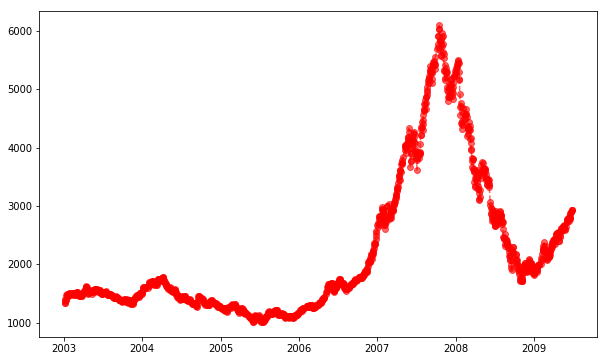

In [96]:
plt.figure(figsize=(10,6))
plt.plot(data['date'],data['p'],'ro--',alpha=0.6);

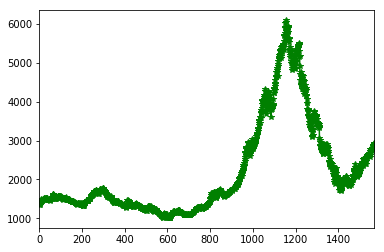

In [97]:
#某个变量的线图
data['p'].plot(style='g*-');

# 五、一阶差分
- ### **diff**

In [98]:
data['p_diff']=data.p.diff()

In [99]:
data.head()

,index,date,p,p_diff
0,上证指数,2003-01-06,1334.68,NaN
1,上证指数,2003-01-07,1332.06,-2.62
2,上证指数,2003-01-08,1372.07,40.01
3,上证指数,2003-01-09,1397.38,25.31
4,上证指数,2003-01-10,1384.86,-12.52


In [100]:
import math

In [101]:
# 取对数进行差分
data['r']=data['p'].map(math.log).diff()

In [102]:
data.r.head()

0         NaN
1   -0.001965
2    0.029594
3    0.018279
4   -0.009000
Name: r, dtype: float64

In [103]:
# 将date作为索引
data.index=data['date']

In [104]:
data.head()

,index,date,p,p_diff,r
date,,,,,
2003-01-06,上证指数,2003-01-06,1334.68,NaN,NaN
2003-01-07,上证指数,2003-01-07,1332.06,-2.62,-0.001965
2003-01-08,上证指数,2003-01-08,1372.07,40.01,0.029594
2003-01-09,上证指数,2003-01-09,1397.38,25.31,0.018279
2003-01-10,上证指数,2003-01-10,1384.86,-12.52,-0.009000


In [105]:
# 此时则可以得到日期和数值
data['p'].head()

date
2003-01-06    1334.68
2003-01-07    1332.06
2003-01-08    1372.07
2003-01-09    1397.38
2003-01-10    1384.86
Name: p, dtype: float64

In [106]:
# 查出某月份下的p值
data['p']['2003-01'].head()

date
2003-01-06    1334.68
2003-01-07    1332.06
2003-01-08    1372.07
2003-01-09    1397.38
2003-01-10    1384.86
Name: p, dtype: float64

# 六、日期频率转换

### date_range函数生成日期范围

In [107]:
#生成一个带日期的数据框
# 先生成日期
index=pd.date_range('2019',periods=100,freq='D')
data2=pd.DataFrame(np.random.randint(3,100,(100,4)),
                   index,columns=list('abcd'))

In [108]:
data2.head()

,a,b,c,d
2019-01-01,45,29,56,50
2019-01-02,36,66,14,57
2019-01-03,38,51,80,82
2019-01-04,28,36,18,64
2019-01-05,46,68,73,16


### asfreq
- help(data.asfreq)

#### 1.高频向低频转化
- 当freq中的数值变大时，意味着从高频向低频转换，即数量由大到小

In [109]:
data2_tolower=data2.asfreq(freq='5D')
data2_tolower.head()
data2_tolower.shape

(20, 4)

### 2.低频转换成高频
- 即数量由少到多

In [110]:
data2_toupper=data2.asfreq(freq='D')
data2_toupper.head()
data2_toupper.shape

(100, 4)

### 填充的方法
- 向后填充  pad
- 向前填充  bfill

In [111]:
data2_tolower.asfreq(freq='10D',method='pad').head(3)

,a,b,c,d
2019-01-01,45,29,56,50
2019-01-11,7,27,98,93
2019-01-21,46,52,40,73
